In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
df=pd.read_csv("ChurnTelecomNew.csv")
#df.head(20)
#df.info()
#df.describe()
#df.count()


[]

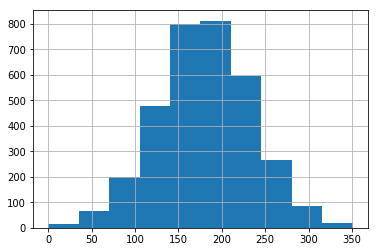

In [2]:
df.total_day_minutes.hist()
plt.plot()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account_length            3333 non-null int64
area_code                 3333 non-null int64
phone_number              3333 non-null object
international_plan        3333 non-null object
voice_mail_plan           3333 non-null object
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float64

In [4]:
df.count()

state                     3333
account_length            3333
area_code                 3333
phone_number              3333
international_plan        3333
voice_mail_plan           3333
number_vmail_messages     3333
total_day_minutes         3333
total_day_calls           3333
total_day_charge          3333
total_eve_minutes         3333
total_eve_calls           3333
total_eve_charge          3333
total_night_minutes       3333
total_night_calls         3333
total_night_charge        3333
total_intl_minutes        3333
total_intl_calls          3333
total_intl_charge         3333
customer_service_calls    3333
churn                     3333
dtype: int64

In [5]:
import seaborn as sns
df.isnull()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df['churn']=[1 if t==True else 0 for t in df.churn]
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [7]:
print(df['churn'].dtype)

int64


In [8]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [9]:
#df.rename(columns={"True":"T"},inplace=True)

In [10]:
print(df.head())

  state  account_length  area_code phone_number international_plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...           

In [11]:
intplan=pd.get_dummies(df['international_plan'],drop_first=True)
intplan.head(20)

,yes
0,0
1,0
2,0
3,1
4,1
5,1
6,0
7,1
8,0
9,1


In [12]:
#vmplan=pd.get_dummies(df['voice_mail_plan'],drop_first=True)
#vmplan.head(20)

[]

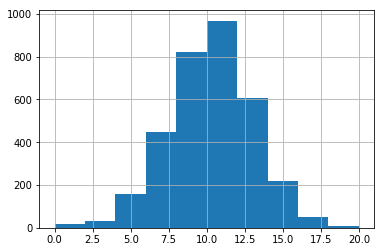

In [13]:
df.total_intl_minutes.hist()
plt.plot()

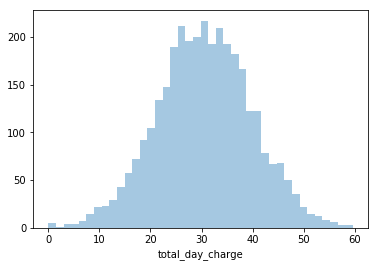

In [14]:
import seaborn as sns
sns.distplot(df.total_day_charge.dropna(), kde=False, bins = 40)

In [15]:
#vmplan=pd.get_dummies(df['voice_mail_plan'],drop_first=True)
#vmplan.head(20)

In [16]:
df=pd.concat([df,intplan],axis=1)


In [17]:
df.head(15)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,yes
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,0,1
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,0,1
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,0,1


In [18]:
df.drop(['state','international_plan','voice_mail_plan'],axis=1,inplace=True)

In [19]:
df.head(15)

,account_length,area_code,phone_number,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,yes
0,128,415,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,107,415,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,137,415,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,84,408,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1
4,75,415,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1
5,118,510,391-8027,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,1
6,121,510,355-9993,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0
7,147,415,329-9001,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,1
8,117,408,335-4719,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0
9,141,415,330-8173,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,1


In [20]:
df.drop(['account_length','area_code'],axis=1,inplace=True)

In [21]:
df.head(15)

,phone_number,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,yes
0,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1
4,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1
5,391-8027,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,1
6,355-9993,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0
7,329-9001,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,1
8,335-4719,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0
9,330-8173,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,1


In [22]:
df.describe()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,0.096910
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,0.295879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,0.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000


[]

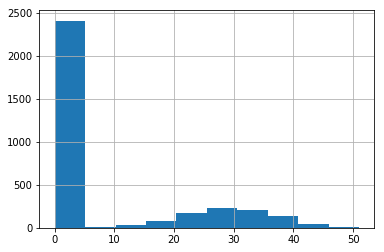

In [23]:
df.number_vmail_messages.hist()
plt.plot()

[]

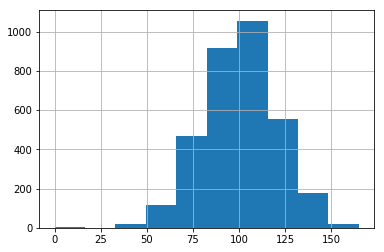

In [24]:
df.total_day_calls.hist()
plt.plot()

[]

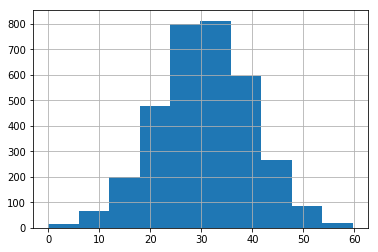

In [25]:
df.total_day_charge.hist()
plt.plot()

[]

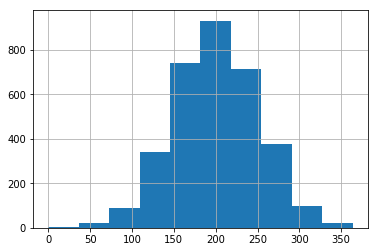

In [26]:
df.total_eve_minutes.hist()
plt.plot()

[]

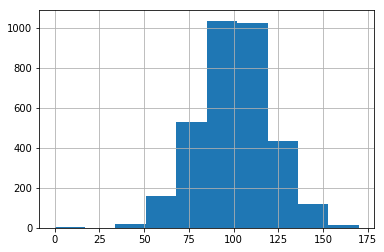

In [27]:
df.total_eve_calls.hist()
plt.plot()

[]

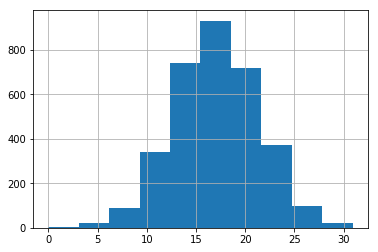

In [28]:
df.total_eve_charge.hist()
plt.plot()

[]

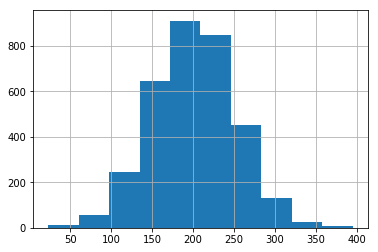

In [29]:
df.total_night_minutes.hist()
plt.plot()

[]

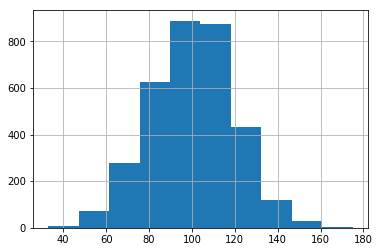

In [30]:
df.total_night_calls.hist()
plt.plot()

[]

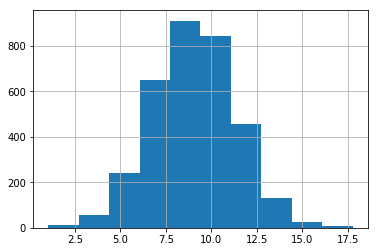

In [31]:
df.total_night_charge.hist()
plt.plot()

[]

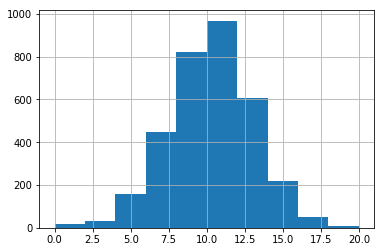

In [32]:
df.total_intl_minutes.hist()
plt.plot()

[]

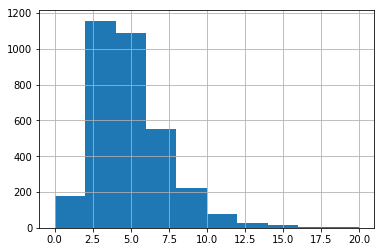

In [33]:
df.total_intl_calls.hist()
plt.plot()

[]

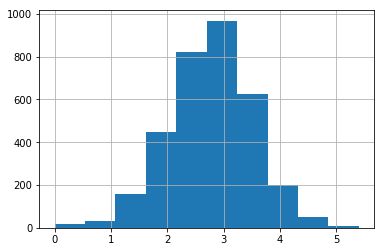

In [34]:
df.total_intl_charge.hist()
plt.plot()

[]

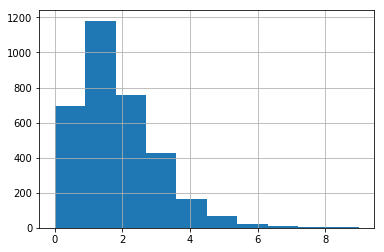

In [35]:
df.customer_service_calls.hist()
plt.plot()

In [36]:
from sklearn import preprocessing
data_normalized = df.dropna().copy()
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(np.array(data_normalized['customer_service_calls']).reshape(-1,1))
data_normalized['normalized_customer_service_calls'] = np_scaled

np_scaled2 = min_max_scaler.fit_transform(np.array(data_normalized['total_intl_calls']).reshape(-1,1))
data_normalized['normalized_total_intl_calls'] = np_scaled2

np_scaled3 = min_max_scaler.fit_transform(np.array(data_normalized['number_vmail_messages']).reshape(-1,1))
data_normalized['normalized_number_vmail_messages'] = np_scaled3

C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
del data_normalized['customer_service_calls']
del data_normalized['total_intl_calls']
del data_normalized['number_vmail_messages']

Model_subset = data_normalized.copy()

In [38]:
Model_subset.head(15)

,phone_number,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_charge,churn,yes,normalized_customer_service_calls,normalized_total_intl_calls,normalized_number_vmail_messages
0,382-4657,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,2.70,0,0,0.111111,0.15,0.490196
1,371-7191,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3.70,0,0,0.111111,0.15,0.509804
2,358-1921,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,3.29,0,0,0.000000,0.25,0.000000
3,375-9999,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,1.78,0,1,0.222222,0.35,0.000000
4,330-6626,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,2.73,0,1,0.333333,0.15,0.000000
5,391-8027,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,1.70,0,1,0.000000,0.30,0.000000
6,355-9993,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,2.03,0,0,0.333333,0.35,0.470588
7,329-9001,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,1.92,0,1,0.000000,0.30,0.000000
8,335-4719,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,2.35,0,0,0.111111,0.20,0.000000
9,330-8173,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,3.02,0,1,0.000000,0.25,0.725490


In [39]:
#Model_subset.drop('phone_number',axis=1,inplace=True)

In [40]:
Model_subset.head()

,phone_number,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_charge,churn,yes,normalized_customer_service_calls,normalized_total_intl_calls,normalized_number_vmail_messages
0,382-4657,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,2.70,0,0,0.111111,0.15,0.490196
1,371-7191,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3.70,0,0,0.111111,0.15,0.509804
2,358-1921,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,3.29,0,0,0.000000,0.25,0.000000
3,375-9999,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,1.78,0,1,0.222222,0.35,0.000000
4,330-6626,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,2.73,0,1,0.333333,0.15,0.000000


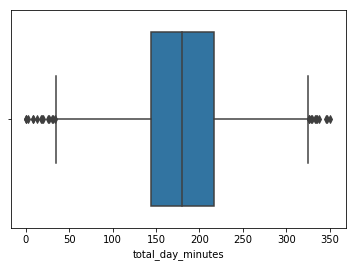

In [41]:
import seaborn as sns
sns.boxplot(x=df['total_day_minutes'])

In [42]:
df["total_day_calls"].corr(df["total_day_charge"])

0.006752961967446346

In [43]:
df["total_day_calls"].corr(df["total_day_minutes"])

0.006750413879729786

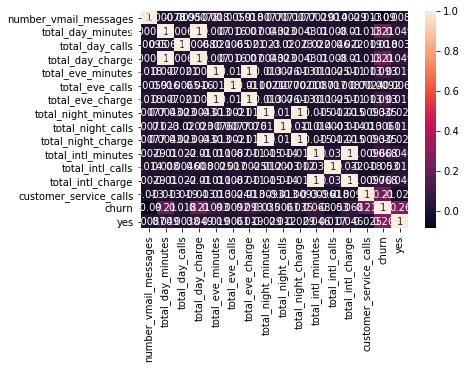

In [44]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df.corr(),annot=True)

In [45]:
df.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'],axis=1,inplace=True)

In [46]:
df.head(20)


,phone_number,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn,yes
0,382-4657,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,0
1,371-7191,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,0
2,358-1921,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0
3,375-9999,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,1
4,330-6626,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,1
5,391-8027,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0,1
6,355-9993,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0,0
7,329-9001,0,157.0,79,103.1,94,211.8,96,7.1,6,0,0,1
8,335-4719,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0,0
9,330-8173,37,258.6,84,222.0,111,326.4,97,11.2,5,0,0,1


In [47]:
df.count()

phone_number              3333
number_vmail_messages     3333
total_day_minutes         3333
total_day_calls           3333
total_eve_minutes         3333
total_eve_calls           3333
total_night_minutes       3333
total_night_calls         3333
total_intl_minutes        3333
total_intl_calls          3333
customer_service_calls    3333
churn                     3333
yes                       3333
dtype: int64

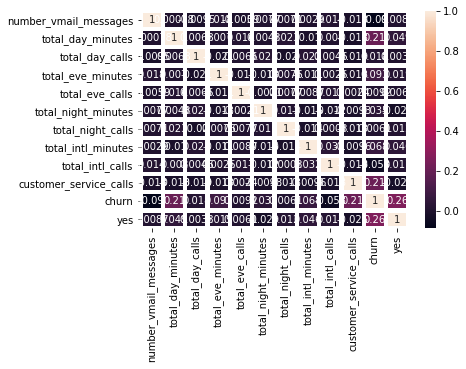

In [48]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df.corr(),annot=True,linewidth=3.5)

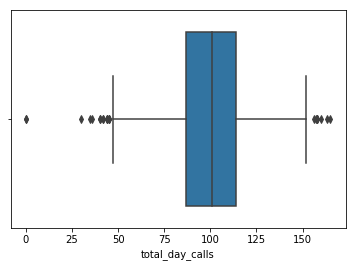

In [49]:
import seaborn as sns
sns.boxplot(x=df['total_day_calls'])

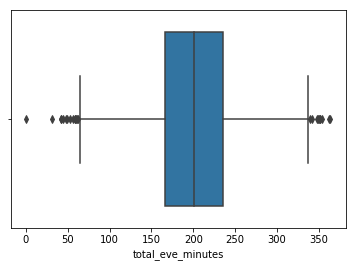

In [50]:
import seaborn as sns
sns.boxplot(x=df['total_eve_minutes'])

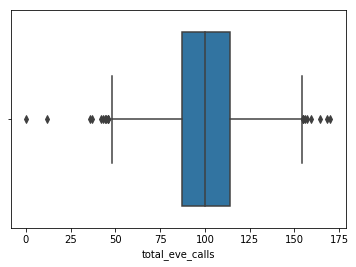

In [51]:
import seaborn as sns
sns.boxplot(x=df['total_eve_calls'])

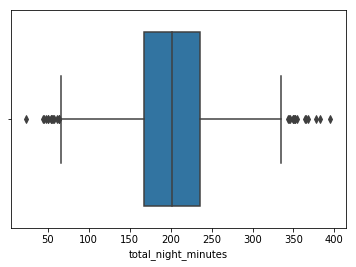

In [52]:
import seaborn as sns
sns.boxplot(x=df['total_night_minutes'])

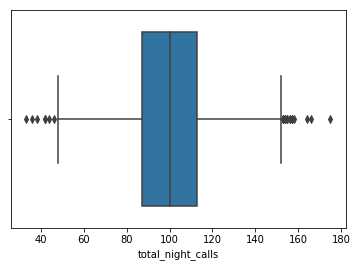

In [53]:
import seaborn as sns
sns.boxplot(x=df['total_night_calls'])

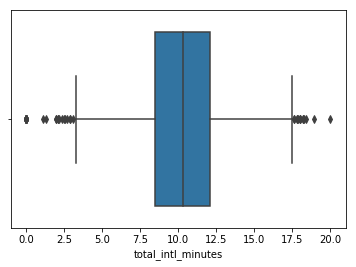

In [54]:
import seaborn as sns
sns.boxplot(x=df['total_intl_minutes'])

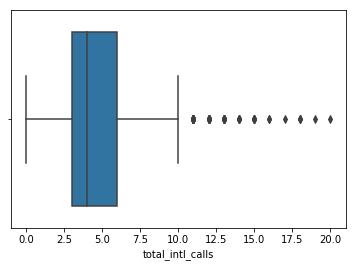

In [55]:
import seaborn as sns
sns.boxplot(x=df['total_intl_calls'])

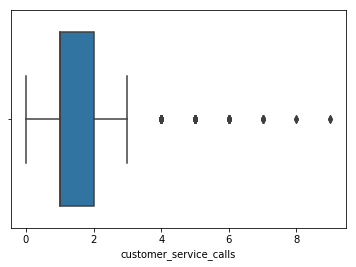

In [56]:
import seaborn as sns
sns.boxplot(x=df['customer_service_calls'])

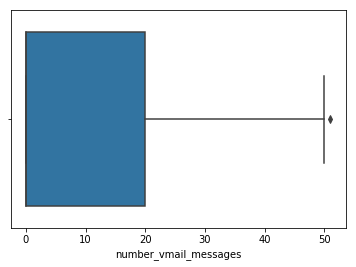

In [57]:
import seaborn as sns
sns.boxplot(x=df['number_vmail_messages'])

In [58]:
df.count()

phone_number              3333
number_vmail_messages     3333
total_day_minutes         3333
total_day_calls           3333
total_eve_minutes         3333
total_eve_calls           3333
total_night_minutes       3333
total_night_calls         3333
total_intl_minutes        3333
total_intl_calls          3333
customer_service_calls    3333
churn                     3333
yes                       3333
dtype: int64

In [59]:
#df["total_day_calls"].corr(df["total_day_charge"])

In [60]:
df["number_vmail_messages"].corr(df["total_day_minutes"])

0.0007782740987005715

In [61]:
df["total_day_minutes"].corr(df["total_day_calls"])

0.006750413879729785

In [62]:
df["total_day_calls"].corr(df["total_eve_calls"])

0.006462113654156998

In [63]:
df["total_eve_calls"].corr(df["total_eve_minutes"])

-0.011430108165517998

In [64]:
df["total_night_calls"].corr(df["total_night_minutes"])

0.011203856290700157

In [65]:
df["total_intl_calls"].corr(df["total_intl_minutes"])

0.03230388408942572

In [66]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2,f_classif
#df.rename(columns={"True":"T"},inplace=True)
#x=df.drop("T",axis=1)
#y=df["T"]
#bestfeatures=SelectKBest(score_func=f_classif,k=3)
#fit=bestfeatures.fit(x,y)
#dfscores=pd.DataFrame(fit.scores_)
#dfcolumns=pd.DataFrame(x.columns)
#featurescores=pd.concat([dfcolumns,dfscores],axis=1)
#featurescores.columns=['specs','scores']
#print(featurescores)

In [67]:
df.describe()

,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn,yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856,0.144914,0.096910
std,13.688365,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491,0.352067,0.295879
min,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,0.000000,0.000000
50%,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,0.000000,0.000000
75%,20.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000,0.000000,0.000000
max,51.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,1.000000,1.000000


In [68]:
df['log_value'] = np.log(df['customer_service_calls'])
print(df)  

     phone_number  number_vmail_messages  total_day_minutes  total_day_calls  \
0        382-4657                     25              265.1              110   
1        371-7191                     26              161.6              123   
2        358-1921                      0              243.4              114   
3        375-9999                      0              299.4               71   
4        330-6626                      0              166.7              113   
5        391-8027                      0              223.4               98   
6        355-9993                     24              218.2               88   
7        329-9001                      0              157.0               79   
8        335-4719                      0              184.5               97   
9        330-8173                     37              258.6               84   
10       329-6603                      0              129.1              137   
11       344-9403                      0

C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [69]:
df['log_value'] = np.log(df['total_intl_calls'])
print(df['total_intl_calls'])  

0        3
1        3
2        5
3        7
4        3
5        6
6        7
7        6
8        4
9        5
10       6
11       5
12       2
13       5
14       6
15       9
16       4
17       3
18       5
19       2
20       4
21       6
22      19
23       6
24       2
25       5
26       3
27       4
28       6
29       1
        ..
3303     7
3304     5
3305     7
3306     3
3307     4
3308     6
3309     4
3310    17
3311     5
3312     4
3313     5
3314     4
3315     4
3316     9
3317     8
3318     4
3319     6
3320     4
3321     8
3322     2
3323     3
3324     4
3325     4
3326     7
3327     5
3328     6
3329     4
3330     6
3331    10
3332     4
Name: total_intl_calls, Length: 3333, dtype: int64


C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [70]:
df['log_value'] = np.log(df['total_eve_calls'])
print(df['total_eve_calls'])  

0        99
1       103
2       110
3        88
4       122
5       101
6       108
7        94
8        80
9       111
10       83
11      148
12       71
13       75
14       76
15       97
16       90
17      111
18       65
19       88
20       93
21      121
22       99
23      102
24       72
25      112
26      112
27      100
28       84
29      109
       ... 
3303    125
3304    140
3305     85
3306    131
3307    123
3308     97
3309    102
3310    107
3311     83
3312     93
3313     95
3314     74
3315    106
3316     96
3317    113
3318    118
3319    115
3320     77
3321    110
3322    122
3323     97
3324    105
3325     88
3326     87
3327     68
3328    126
3329     55
3330     58
3331     84
3332     82
Name: total_eve_calls, Length: 3333, dtype: int64


C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [71]:
df['log_value'] = np.log(df['total_day_calls'])
print(df["total_day_calls"])  

0       110
1       123
2       114
3        71
4       113
5        98
6        88
7        79
8        97
9        84
10      137
11      127
12       96
13       88
14       70
15       67
16      139
17      114
18       66
19       90
20      117
21       89
22      112
23      103
24       86
25       76
26      115
27       73
28      109
29      117
       ... 
3303     88
3304    114
3305    127
3306    131
3307    109
3308     87
3309    112
3310     91
3311     94
3312    130
3313    128
3314     81
3315    106
3316    111
3317     90
3318    131
3319     99
3320    101
3321    118
3322    105
3323    126
3324    114
3325     99
3326    128
3327     98
3328     77
3329     57
3330    109
3331    105
3332    113
Name: total_day_calls, Length: 3333, dtype: int64


C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [72]:
df['log_value'] = np.log(df['number_vmail_messages'])
print(df["number_vmail_messages"])  

0       25
1       26
2        0
3        0
4        0
5        0
6       24
7        0
8        0
9       37
10       0
11       0
12       0
13       0
14       0
15       0
16      27
17       0
18      33
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26      39
27       0
28       0
29       0
        ..
3303    26
3304     0
3305    22
3306    29
3307     0
3308     0
3309     0
3310     0
3311     0
3312     0
3313     0
3314     0
3315    18
3316    29
3317     0
3318     0
3319     0
3320     0
3321     0
3322     0
3323     0
3324     0
3325     0
3326     0
3327     0
3328    36
3329     0
3330     0
3331     0
3332    25
Name: number_vmail_messages, Length: 3333, dtype: int64


C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [73]:
df['sqr_value'] = np.square(df['total_intl_calls'])
print(df["total_intl_calls"])  

0        3
1        3
2        5
3        7
4        3
5        6
6        7
7        6
8        4
9        5
10       6
11       5
12       2
13       5
14       6
15       9
16       4
17       3
18       5
19       2
20       4
21       6
22      19
23       6
24       2
25       5
26       3
27       4
28       6
29       1
        ..
3303     7
3304     5
3305     7
3306     3
3307     4
3308     6
3309     4
3310    17
3311     5
3312     4
3313     5
3314     4
3315     4
3316     9
3317     8
3318     4
3319     6
3320     4
3321     8
3322     2
3323     3
3324     4
3325     4
3326     7
3327     5
3328     6
3329     4
3330     6
3331    10
3332     4
Name: total_intl_calls, Length: 3333, dtype: int64


In [74]:
df['sqr_value'] = np.log(df['total_eve_calls'])
print(df["total_eve_calls"])  

0        99
1       103
2       110
3        88
4       122
5       101
6       108
7        94
8        80
9       111
10       83
11      148
12       71
13       75
14       76
15       97
16       90
17      111
18       65
19       88
20       93
21      121
22       99
23      102
24       72
25      112
26      112
27      100
28       84
29      109
       ... 
3303    125
3304    140
3305     85
3306    131
3307    123
3308     97
3309    102
3310    107
3311     83
3312     93
3313     95
3314     74
3315    106
3316     96
3317    113
3318    118
3319    115
3320     77
3321    110
3322    122
3323     97
3324    105
3325     88
3326     87
3327     68
3328    126
3329     55
3330     58
3331     84
3332     82
Name: total_eve_calls, Length: 3333, dtype: int64


C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [75]:
df['sqr_value'] = np.log(df['total_day_calls'])
print(df["total_day_calls"])  

0       110
1       123
2       114
3        71
4       113
5        98
6        88
7        79
8        97
9        84
10      137
11      127
12       96
13       88
14       70
15       67
16      139
17      114
18       66
19       90
20      117
21       89
22      112
23      103
24       86
25       76
26      115
27       73
28      109
29      117
       ... 
3303     88
3304    114
3305    127
3306    131
3307    109
3308     87
3309    112
3310     91
3311     94
3312    130
3313    128
3314     81
3315    106
3316    111
3317     90
3318    131
3319     99
3320    101
3321    118
3322    105
3323    126
3324    114
3325     99
3326    128
3327     98
3328     77
3329     57
3330    109
3331    105
3332    113
Name: total_day_calls, Length: 3333, dtype: int64


C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [76]:
df['sqr_value'] = np.square(df['number_vmail_messages'])
print(df["number_vmail_messages"])  

0       25
1       26
2        0
3        0
4        0
5        0
6       24
7        0
8        0
9       37
10       0
11       0
12       0
13       0
14       0
15       0
16      27
17       0
18      33
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26      39
27       0
28       0
29       0
        ..
3303    26
3304     0
3305    22
3306    29
3307     0
3308     0
3309     0
3310     0
3311     0
3312     0
3313     0
3314     0
3315    18
3316    29
3317     0
3318     0
3319     0
3320     0
3321     0
3322     0
3323     0
3324     0
3325     0
3326     0
3327     0
3328    36
3329     0
3330     0
3331     0
3332    25
Name: number_vmail_messages, Length: 3333, dtype: int64


In [77]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
#seed(1)
# generate univariate observations
total_day_calls = 5 * randn(3333) + 50
# calculate interquartile range
q25, q75 = percentile(total_day_calls, 25), percentile(total_day_calls, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in total_day_calls if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in total_day_calls if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.497, 75th=53.465, IQR=6.969
Identified outliers: 18
Non-outlier observations: 3315


In [78]:
per=100*(len(outliers)/(len(df)))
print(per)

0.54005400540054


In [79]:
print(len(df))

3333


In [80]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
#seed(1)
# generate univariate observations
total_eve_calls = 5 * randn(3333) + 50
# calculate interquartile range
q25, q75 = percentile(total_eve_calls, 25), percentile(total_eve_calls, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in total_eve_calls if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in total_eve_calls if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
per=100*(len(outliers)/(len(df)))
print(per)

Percentiles: 25th=46.798, 75th=53.522, IQR=6.724
Identified outliers: 17
Non-outlier observations: 3316
0.51005100510051


In [81]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
#seed(1)
# generate univariate observations
total_eve_minutes = 5 * randn(3333) + 50
# calculate interquartile range
q25, q75 = percentile(total_eve_minutes, 25), percentile(total_eve_minutes, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in total_eve_minutes if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in total_eve_minutes if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
per=100*(len(outliers)/(len(df)))
print(per)

Percentiles: 25th=46.763, 75th=53.431, IQR=6.668
Identified outliers: 24
Non-outlier observations: 3309
0.7200720072007201


In [82]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
#seed(1)
# generate univariate observations
total_night_minutes = 5 * randn(3333) + 50
# calculate interquartile range
q25, q75 = percentile(total_night_minutes, 25), percentile(total_night_minutes, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in total_night_minutes if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in total_night_minutes if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
per=100*(len(outliers)/(len(df)))
print(per)

Percentiles: 25th=46.613, 75th=53.423, IQR=6.810
Identified outliers: 27
Non-outlier observations: 3306
0.8100810081008101


In [83]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
#seed(1)
# generate univariate observations
total_night_calls = 5 * randn(3333) + 50
# calculate interquartile range
q25, q75 = percentile(total_night_calls, 25), percentile(total_night_calls, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in total_night_calls if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in total_night_calls if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
per=100*(len(outliers)/(len(df)))
print(per)

Percentiles: 25th=46.554, 75th=53.144, IQR=6.590
Identified outliers: 33
Non-outlier observations: 3300
0.9900990099009901


In [84]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
#seed(1)
# generate univariate observations
total_intl_minutes = 5 * randn(3333) + 50
# calculate interquartile range
q25, q75 = percentile(total_intl_minutes, 25), percentile(total_intl_minutes, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in total_intl_minutes if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in total_intl_minutes if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
per=100*(len(outliers)/(len(df)))
print(per)

Percentiles: 25th=46.643, 75th=53.343, IQR=6.700
Identified outliers: 19
Non-outlier observations: 3314
0.57005700570057


In [85]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
#seed(1)
# generate univariate observations
total_intl_calls = 5 * randn(3333) + 50
# calculate interquartile range
q25, q75 = percentile(total_intl_calls, 25), percentile(total_intl_calls, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in total_intl_calls if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in total_intl_calls if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
per=100*(len(outliers)/(len(df)))
print(per)

Percentiles: 25th=46.760, 75th=53.281, IQR=6.521
Identified outliers: 26
Non-outlier observations: 3307
0.7800780078007801


In [86]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
#seed(1)
# generate univariate observations
total_day_calls = 5 * randn(3333) + 50
# calculate interquartile range
q25, q75 = percentile(total_day_calls, 25), percentile(total_day_calls, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in total_day_calls if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in total_day_calls if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
per=100*(len(outliers)/(len(df)))
print(per)

Percentiles: 25th=46.723, 75th=53.334, IQR=6.611
Identified outliers: 26
Non-outlier observations: 3307
0.7800780078007801


In [87]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
#seed(1)
# generate univariate observations
total_day_minutes = 5 * randn(3333) + 50
# calculate interquartile range
q25, q75 = percentile(total_day_minutes, 25), percentile(total_day_minutes, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in total_day_minutes if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in total_day_minutes if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
per=100*(len(outliers)/(len(df)))
print(per)

Percentiles: 25th=46.573, 75th=53.324, IQR=6.751
Identified outliers: 22
Non-outlier observations: 3311
0.6600660066006601


In [88]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
#seed(1)
# generate univariate observations
customer_service_calls= 5 * randn(3333) + 50
# calculate interquartile range
q25, q75 = percentile(customer_service_calls, 25), percentile(customer_service_calls, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in customer_service_calls if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in customer_service_calls if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
per=100*(len(outliers)/(len(df)))
print(per)

Percentiles: 25th=46.723, 75th=53.139, IQR=6.416
Identified outliers: 42
Non-outlier observations: 3291
1.2601260126012601


In [89]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
#seed(1)
# generate univariate observations
number_vmail_messages = 5 * randn(3333) + 50
# calculate interquartile range
q25, q75 = percentile(number_vmail_messages, 25), percentile(number_vmail_messages, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in number_vmail_messages if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in number_vmail_messages if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
per=100*(len(outliers)/(len(df)))
print(per)

Percentiles: 25th=46.882, 75th=53.523, IQR=6.640
Identified outliers: 25
Non-outlier observations: 3308
0.7500750075007501


In [90]:
#print(df.head(15))

In [91]:
df.count()

phone_number              3333
number_vmail_messages     3333
total_day_minutes         3333
total_day_calls           3333
total_eve_minutes         3333
total_eve_calls           3333
total_night_minutes       3333
total_night_calls         3333
total_intl_minutes        3333
total_intl_calls          3333
customer_service_calls    3333
churn                     3333
yes                       3333
log_value                 3333
sqr_value                 3333
dtype: int64

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
    

In [93]:
df_majority=df[df.churn==0]
df_minority=df[df.churn==1]
df_minority_upsampled=resample(df_minority,replace=True,n_samples=2850,random_state=20)
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
df_upsampled.churn.value_counts()


1    2850
0    2850
Name: churn, dtype: int64

In [94]:
df.drop(['phone_number','log_value','sqr_value'],axis=1,inplace=True)

In [95]:
df.head(15)

,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn,yes
0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,0
1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,0
2,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0
3,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,1
4,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,1
5,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0,1
6,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0,0
7,0,157.0,79,103.1,94,211.8,96,7.1,6,0,0,1
8,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0,0
9,37,258.6,84,222.0,111,326.4,97,11.2,5,0,0,1


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
    

In [97]:
df_majority=df[df.churn==0]
df_minority=df[df.churn==1]
df_minority_upsampled=resample(df_minority,replace=True,n_samples=2850,random_state=4)
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
df_upsampled.churn.value_counts()

1    2850
0    2850
Name: churn, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
y=df_upsampled.churn
X=df_upsampled.drop('churn',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.28,random_state=4)
from sklearn.linear_model import LogisticRegression
cp1=LogisticRegression()
cp1.fit(X_train,y_train)
pred_y1=cp1.predict(X)
print(accuracy_score(y,pred_y1))
print(np.unique(pred_y1))

0.7587719298245614
[0 1]


C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y,pred_y1)
res

array([[2178,  672],
       [ 703, 2147]], dtype=int64)

In [100]:
df_majority=df[df.churn==0]
df_minority=df[df.churn==1]
df_majority_downsampled=resample(df_majority,replace=False,n_samples=483,random_state=4)
df_downsampled=pd.concat([df_majority_downsampled,df_minority])
df_downsampled.churn.value_counts()


1    483
0    483
Name: churn, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split
y=df_downsampled.churn
X=df_downsampled.drop('churn',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.28,random_state=4)
from sklearn.linear_model import LogisticRegression
cp2=LogisticRegression()
cp2.fit(X_train,y_train)
pred_y2=cp1.predict(X)
print(accuracy_score(y,pred_y2))

0.7453416149068323


C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [102]:
res1=confusion_matrix(y,pred_y2)
res1

array([[358, 125],
       [121, 362]], dtype=int64)

In [103]:
print(np.unique(pred_y2))

[0 1]


In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.48,random_state=4)

In [105]:
from sklearn.tree import DecisionTreeClassifier
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=4,max_depth=3)
classifier_entropy.fit(X_train,y_train)       #creating the model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')

In [106]:
y_pred=classifier_entropy.predict(X_test)
print(y_pred)

[1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1
 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1
 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0
 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1
 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0
 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0]


In [107]:
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(y_test,y_pred)*100)

Accuracy is: 81.89655172413794


In [108]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[192  39]
 [ 45 188]]


In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.28)
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
print(X_train)

[[ 1.22081231 -2.14090076  1.15581798 ...  0.63695522 -1.20165063
  -0.45452967]
 [-0.57884738  1.21589725  2.10214948 ...  2.54015332  1.98107494
  -0.45452967]
 [ 1.59574142 -0.47937412 -0.45294557 ... -0.88560326  0.70798471
   2.20007639]
 ...
 [-0.57884738  1.38783473 -0.26367927 ...  0.2563156  -0.56510552
  -0.45452967]
 [-0.57884738 -0.87627652  0.25680305 ...  0.63695522  0.0714396
  -0.45452967]
 [-0.57884738  1.11948372 -1.49391023 ... -0.12432402 -1.20165063
  -0.45452967]]


C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aniket\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [110]:
#Define model init
import math
print(math.sqrt(len(X_test)))
classifier=KNeighborsClassifier(n_neighbors=15,p=2,metric='euclidean')
classifier.fit(X_train,y_train)

16.46207763315433


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [111]:
y_pred=classifier.predict(X_test)
print(y_pred)

[1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0
 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1
 0 1 0 0 0 1 1 1 0 0 0 1]


In [112]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[105  19]
 [ 33 114]]


In [113]:
accuracy_score(y_test,y_pred)

0.8081180811808119

In [114]:
from sklearn.metrics import classification_report 
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.76      0.85      0.80       124\n           1       0.86      0.78      0.81       147\n\n   micro avg       0.81      0.81      0.81       271\n   macro avg       0.81      0.81      0.81       271\nweighted avg       0.81      0.81      0.81       271\n'

In [123]:
x=df["customer_service_calls"].values
print(x.shape)
m=len(x)
x=x.reshape((m,-1))
print(x.shape)
y=df["churn"].values
y=y.reshape((m,-1))

(3333,)
(3333, 1)


In [124]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
regmodel=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)
regmodel.fit(x_train,y_train)
a=regmodel.predict(x_test)
print(a[4])
print(y_test[4])
r2=regmodel.score(x,y)
print(r2)

[0.11418661]
[0]
0.043132913257722505
